<a href="https://colab.research.google.com/github/QiyuLiu21/L04/blob/master/fraud_detection_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Database/PS_20174392719_1491204439457_log.csv")

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.shape

(6362620, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data_agg = data.groupby(data["type"]).sum().reset_index()
data_agg

,type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,342111075,2.363674e+11,5.024078e+12,5.260438e+12,2.221949e+12,2.052897e+12,0,0
1,CASH_OUT,539015395,3.944130e+11,1.029783e+11,3.909851e+10,3.351233e+12,3.784342e+12,4116,0
2,DEBIT,10293386,2.271992e+08,2.844196e+09,2.699778e+09,6.186360e+10,6.268676e+10,0,0
3,PAYMENT,525778430,2.809337e+10,1.467682e+11,1.330439e+11,0.000000e+00,0.000000e+00,0,0
4,TRANSFER,131445897,4.852920e+11,2.901255e+10,5.482651e+09,1.368300e+12,1.894261e+12,4097,16


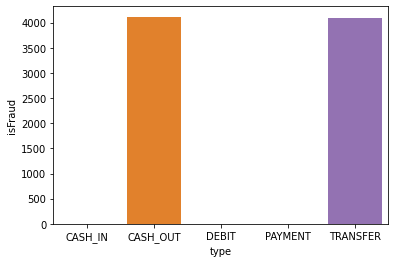

In [23]:
sns.barplot(x=data_agg["type"], y = data_agg["isFraud"])

In [10]:
data_agg2 = data.groupby(data["step"]).sum().reset_index()
data_agg2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2.854292e+08,2.392695e+09,2.449811e+09,2.019706e+09,2.670425e+09,16,0
1,2,8.592160e+07,1.207902e+09,1.230152e+09,9.204119e+08,9.555345e+08,8,0
2,3,4.329388e+07,4.259244e+08,4.431034e+08,5.542691e+08,5.603481e+08,4,0
3,4,7.291003e+07,6.151320e+08,6.100317e+08,7.106773e+08,7.800897e+08,10,0
4,5,4.554809e+07,7.416566e+08,7.632521e+08,7.214833e+08,7.208779e+08,6,0
...,...,...,...,...,...,...,...,...
738,739,1.658783e+07,1.658783e+07,0.000000e+00,8.510574e+06,1.680449e+07,10,0
739,740,7.632964e+06,7.632964e+06,0.000000e+00,2.930014e+06,6.746496e+06,6,0
740,741,8.782899e+07,1.705272e+08,8.837274e+07,4.420524e+06,4.549775e+07,22,1
741,742,1.432374e+07,1.432374e+07,0.000000e+00,1.875033e+06,9.036900e+06,14,0


In [12]:
data_agg2_top10 = data_agg2.sort_values(by = "isFraud", ascending= False).head(10)

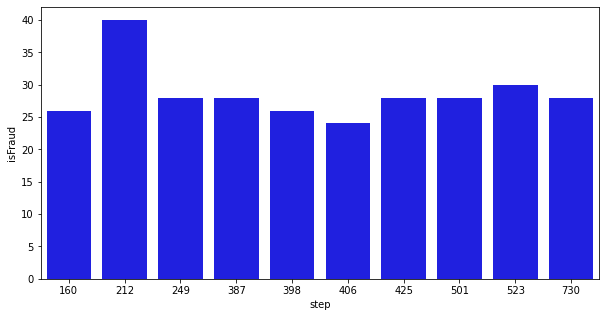

In [21]:
plt.figure(figsize = (10,5))
sns.barplot(x=data_agg2_top10["step"], y = data_agg2_top10["isFraud"], color = "blue")

In [52]:
data_amount = data.groupby(data["type"]).mean().reset_index()
data_amount.head()

,type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,CASH_IN,244.490093,168920.242004,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06,0.000000,0.00000,1.0,0.0,0.0,0.0,0.0
1,CASH_OUT,240.900735,176273.964346,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,0.001840,0.00000,0.0,1.0,0.0,0.0,0.0
2,DEBIT,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0
3,PAYMENT,244.378179,13057.604660,6.821683e+04,6.183789e+04,0.000000e+00,0.000000e+00,0.000000,0.00000,0.0,0.0,0.0,1.0,0.0
4,TRANSFER,246.657304,910647.009645,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.00003,0.0,0.0,0.0,0.0,1.0


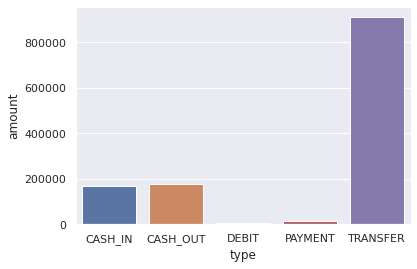

In [55]:
sns.barplot(x = data_amount["type"], y = data_amount["amount"])

In [51]:
data_amount2 = data_amount["amount"].sum()
data_amount2

1300652811.7000003

In [24]:
data_encoded = pd.get_dummies(data["type"])
data_encoded

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [25]:
data = pd.concat([data,data_encoded],axis = 1)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


Dropping the useless Columns.

In [26]:
data2 = data.drop(columns = ['type','nameOrig','nameDest', 'isFlaggedFraud'], axis = 1)
data2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


Separating the features from the labels.

In [38]:
X = data2.drop(['isFraud'], axis = 1)
y = data2['isFraud']

Pass the correlation matrix to a seaborn heatmap method to generate the graphic.


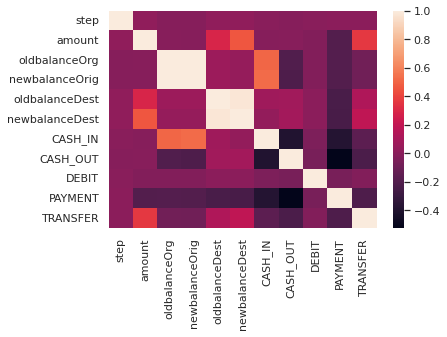

In [39]:
sns.heatmap(X.corr())

In [40]:
X = data2.drop(['isFraud'], axis = 1).values
y = data2['isFraud'].values

Splitting the Dataset into Training and Test Sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=30000000)
classifier.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=30000000)

Using the model to make predictions on the test dataset.

In [44]:
y_pred = classifier.predict(X_test)

Generating a confusion matrix.

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1906222      76]
 [   1388    1100]]


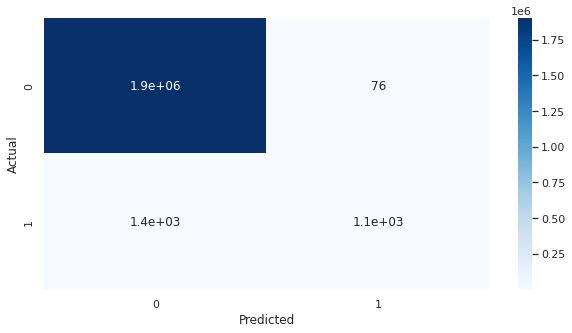

In [46]:
cm_df = pd.DataFrame(cm, columns = np.unique(y_test), index = np.unique(y_test))
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"
plt.figure(figsize = (10,5))
sns.set(font_scale = 1)
sns.heatmap(cm_df, cmap = "Blues", annot = True)


Printing the classification report.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906298
           1       0.94      0.44      0.60      2488

    accuracy                           1.00   1908786
   macro avg       0.97      0.72      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786

